<a href="https://colab.research.google.com/github/isadora-yasmim/Data-science-studies-n-practice/blob/main/Imers%C3%A3o%20Dados%20com%20Python-ALURA/Aula_1_Imersao_Alura_Dados_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Aula 01**
_Explore Dados com Pandas_

In [49]:
import pandas as pd

In [50]:
#importa a base dados
base = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [51]:
#retorna as 5 primeiras linhas da base de dados, por padrão. caso queiramos mais linhas basta especificar base.head(num de linhas desejadas)
base.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [52]:
#retorna as colunas, os tipos, o range e a meoria usada
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [53]:
#retorna infos de estatistica descritiva sobre os dados numerico da base de dados(count= numero total, mean= media, std= desvio padrao, min= minimo, max= maximo, 25%, 50% e 75%)
base.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [54]:
# shape= atributo que descreve a dimensao do arquivo tuplas x colunas
base.shape

(133349, 11)

In [55]:
# defino o valor das variaveis linhas e colunas como o valor de base.shape nas posicoes 0 e 1 respectivamente
linhas, colunas = base.shape[0], base.shape[1]
print('Numero de linhas:', linhas)
print('Numero de colunas:', colunas)

Numero de linhas: 133349
Numero de colunas: 11


In [56]:
#columns= atributo que lista os nomes das colunas
base.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [57]:
# dicionario com o nome da coluna em ingles e sua respectiva traducao
mapeamento_colunas = {
    'work_year': 'ano',
    'experience_level': 'nivel_experiencia',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# rename= metodo que vai renomear, neste caso, as colunas da nossa base
base = base.rename(columns=mapeamento_colunas)

print("Colunas traduzidas com sucesso!")
print(base.columns)

Colunas traduzidas com sucesso!
Index(['ano', 'nivel_experiencia', 'contrato', 'cargo', 'salario', 'moeda',
       'usd', 'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [58]:
#value_counts()= metodo que retorna a frequencia dos dados em uma coluna especifica
base['nivel_experiencia'].value_counts()
#SE- senior, MI- pleno, EN- junior e EX- C level

,count
nivel_experiencia,
SE,77241
MI,40465
EN,12443
EX,3200


In [59]:
base['contrato'].value_counts()
#FT- full time , CT- contrato temporario, PT- part time , FL- freelance

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [60]:
base['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [61]:
base['remoto'].value_counts()
#0- presencial, 100- remoto e 50- hibrido

,count
remoto,
0,105312
100,27718
50,319


In [62]:
#dicionario com o nome atual e o nome desejado das categorias
map_nivel_experiencia = {
    'SE': 'Senior',
    'MI': 'Pleno' ,
    'EN':' Junior',
    'EX':' C level'
}

#substituimos os nomes das categorias
base['nivel_experiencia'] = base['nivel_experiencia'].replace(map_nivel_experiencia)
print("Categorias de nivel_experiencia renomeadas com sucesso!")
base['nivel_experiencia'].value_counts()


Categorias de nivel_experiencia renomeadas com sucesso!


,count
nivel_experiencia,
Senior,77241
Pleno,40465
Junior,12443
C level,3200


In [63]:
map_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato Temporário',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
}

base['contrato'] = base['contrato'].replace(map_contrato)
print("Categorias de contrato renomeadas com sucesso!")
base['contrato'].value_counts()

Categorias de contrato renomeadas com sucesso!


,count
contrato,
Tempo Integral,132563
Contrato Temporário,394
Meio Período,376
Freelancer,16


In [64]:
map_tamanho_empresa = {
    'M': 'Média',
    'L': 'Grande',
    'S': 'Pequena'
}

base['tamanho_empresa'] = base['tamanho_empresa'].replace(map_tamanho_empresa)
print("Categorias de tamanho_empresa renomeadas com sucesso!")
base['tamanho_empresa'].value_counts()

Categorias de tamanho_empresa renomeadas com sucesso!


,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [65]:
map_remoto = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
}

base['remoto'] = base['remoto'].replace(map_remoto)
print("Categorias de remoto renomeadas com sucesso!")
base['remoto'].value_counts()

Categorias de remoto renomeadas com sucesso!


,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [66]:
base.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [67]:
#retorna infos de estatistica descritiva sobre os dados gerais da base(count= numero total, unique= quantos valores diferentes existem, top= valor mais repetido e freq= frequencia do valor mais repetido)
base.describe(include= "object")

,nivel_experiencia,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


###**Aula 02**
_Aprenda a limpar e preparar os Dados_

In [68]:
#isnull()= metodo que vai mostrar false para espacos preenchido e true para espacos nulos
base.isnull()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [69]:
#sum()= soma o numero de valores nulos de cada coluna
base.isnull().sum()

,0
ano,10
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [70]:
#unique()= retorna os valores unicos, obs: nan= not a number, ou seja, o que esta nulo
base['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [71]:
# retorna todas as linhas em que ha um valor nulo(axis=1 quer dizer true, ou seja retorne as linhas onde null e true)
base[base.isnull().any(axis=1)]

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


_**Formas de preencher dados faltantes**_

In [72]:
import numpy as np
df_salarios = pd.DataFrame({
    'nome': ['Ana','Bruno', 'Carlos', 'Daniele', 'Eduardo'],
    'salario': [4000, np.nan, 5000, np.nan,100000 ]
})

#fillna(df_salarios['salario'].mean().round(2))= preenche os valores nulos com a media com duas casa decimais(round(2))
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

#fillna(df_salarios['salario'].median())= preenche os valores nulos com a mediana(mais adequado em casos de valores muito destoantes)
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios



,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Eduardo,100000.0,100000.00,100000.0


In [73]:
df_temperaturas = pd.DataFrame({
  'Dia': ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta'],
  'Temperatura': [30, np.nan, np.nan, 28, 27]
})

#ffill()= foward fill, repete o ultimo valor nos espacos vazios ate deixar de ser vazio
df_temperaturas['preenchido_ffill']= df_temperaturas['Temperatura'].ffill()

#ffill()= back fill, repete o proximo valor nos espacos vazios ate deixar de ser vazio
df_temperaturas['preenchido_bfill']= df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill,preenchido_bfill
0,Segunda,30.0,30.0,30.0
1,Terca,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


In [74]:
df_cidades = pd.DataFrame({
  'nome': ['Ana','Bruno', 'Carlos', 'Daniele', 'Eduardo'],
  'cidade': ['Rio de Janeiro', np.nan, 'Goiania', np.nan, 'Salvador']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Nao informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,Rio de Janeiro,Rio de Janeiro
1,Bruno,NaN,Nao informado
2,Carlos,Goiania,Goiania
3,Daniele,NaN,Nao informado
4,Eduardo,Salvador,Salvador


_**Neste caso, uma boa saida para os dados faltantes e retira-los da base, como temos uma base extensa essa retirada nao prejudicara a analise**_

In [75]:
df_limpo = base.dropna()

In [76]:
df_limpo.isnull().sum()

,0
ano,0
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [77]:
df_limpo.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [78]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ano                133339 non-null  float64
 1   nivel_experiencia  133339 non-null  object 
 2   contrato           133339 non-null  object 
 3   cargo              133339 non-null  object 
 4   salario            133339 non-null  int64  
 5   moeda              133339 non-null  object 
 6   usd                133339 non-null  int64  
 7   residencia         133339 non-null  object 
 8   remoto             133339 non-null  object 
 9   empresa            133339 non-null  object 
 10  tamanho_empresa    133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [79]:
#.assign(ano = df_limpo['ano'].astype('int64'))= converte o tipo da coluna ano para int64
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))


###**Aula 03**
_Crie gráficos e conte histórias com Dados_


In [80]:
df_limpo.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuicao de Senioridade'}, xlabel='nivel_experiencia'>

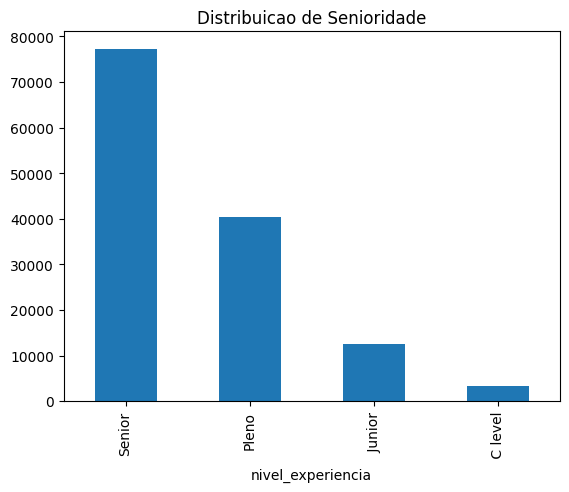

In [85]:
df_limpo['nivel_experiencia'].value_counts().plot(kind='bar', title="Distribuicao de Senioridade")

In [86]:
import seaborn as sns

<Axes: xlabel='nivel_experiencia', ylabel='usd'>

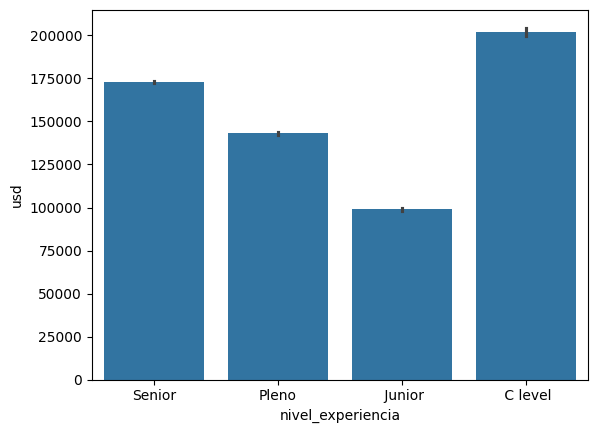

In [87]:
sns.barplot(data = df_limpo, x='nivel_experiencia', y='usd')

In [88]:
import matplotlib.pyplot as plt

NameError: name 'pink' is not defined

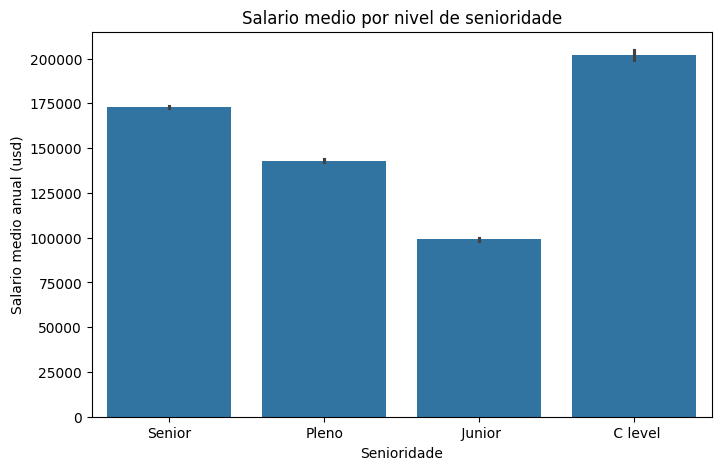

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x='nivel_experiencia', y='usd')
plt.title('Salario medio por nivel de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario medio anual (usd)')
plt.show()

In [95]:
df_limpo.groupby('nivel_experiencia')['usd'].mean().sort_values(ascending = False)

,usd
nivel_experiencia,
C level,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [100]:
ordem=df_limpo.groupby('nivel_experiencia')['usd'].mean().sort_values(ascending = True).index
ordem

Index([' Junior', 'Pleno', 'Senior', ' C level'], dtype='object', name='nivel_experiencia')

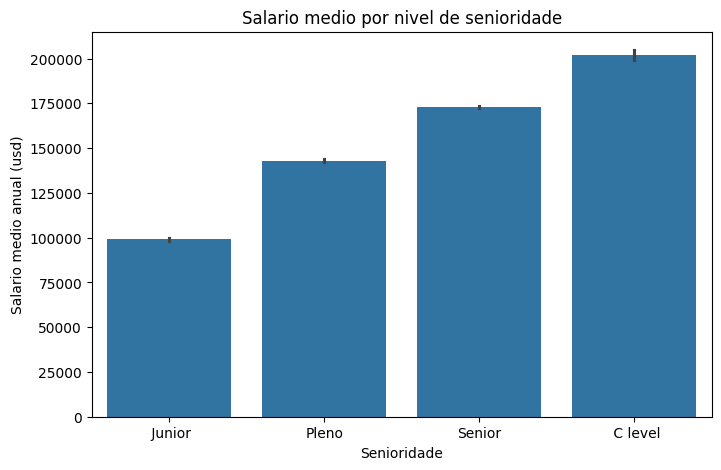

In [101]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x='nivel_experiencia', y='usd', order = ordem)
plt.title('Salario medio por nivel de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario medio anual (usd)')
plt.show()

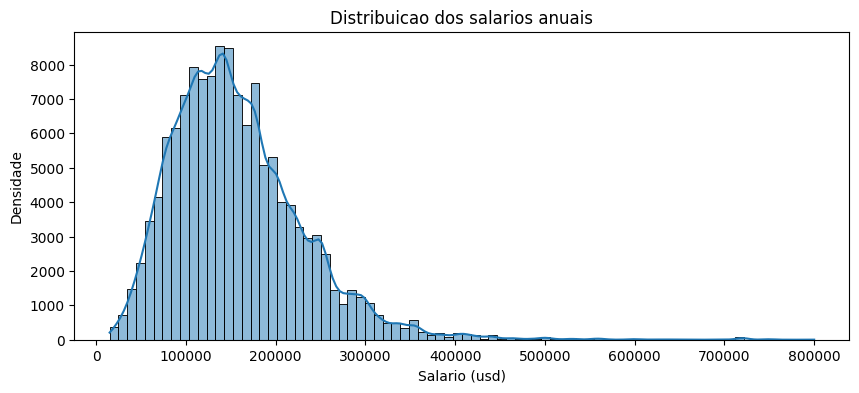

In [112]:
plt.figure(figsize=(10,4))
sns.histplot(df_limpo['usd'], bins = 80, kde=True)
plt.title('Distribuicao dos salarios anuais')
plt.xlabel('Salario (usd)')
plt.ylabel('Densidade')
plt.show()


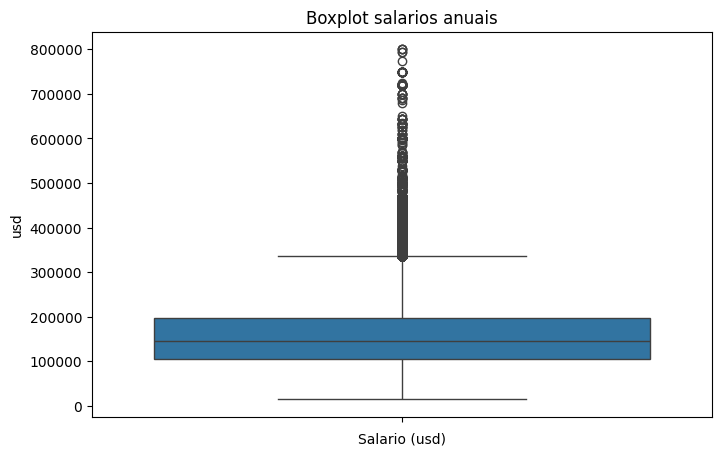

In [117]:
plt.figure(figsize=(8,5))
sns.boxplot(df_limpo['usd'])
plt.title('Boxplot salarios anuais')
plt.xlabel('Salario (usd)')
plt.show()

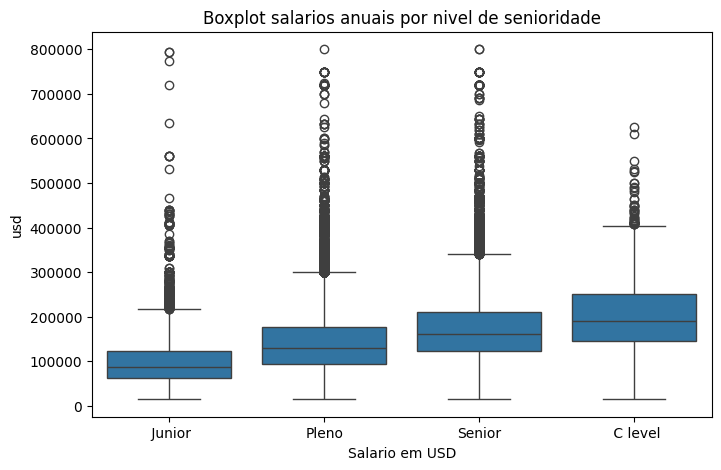

In [125]:
ordem_senioridade = [' Junior', 'Pleno', 'Senior', ' C level']

plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x ='nivel_experiencia', y ='usd', order = ordem_senioridade)
plt.title('Boxplot salarios anuais por nivel de senioridade')
plt.xlabel('Salario em USD')
plt.show()

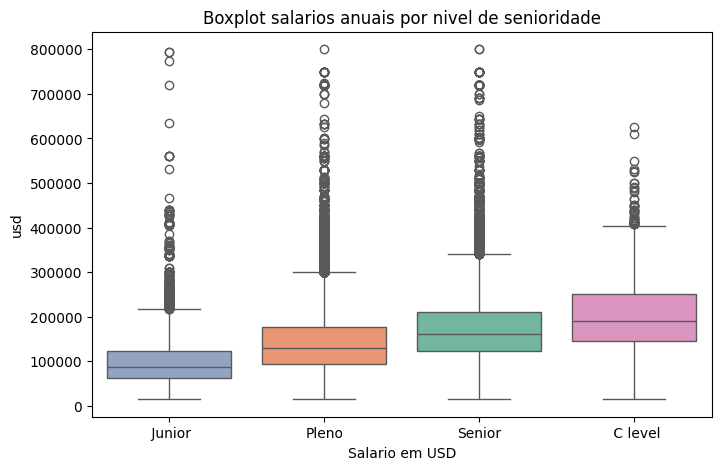

In [126]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x ='nivel_experiencia', y ='usd', order = ordem_senioridade, palette='Set2', hue='nivel_experiencia')
plt.title('Boxplot salarios anuais por nivel de senioridade')
plt.xlabel('Salario em USD')
plt.show()

In [128]:
import plotly.express as px

In [130]:
df_salario_senioridade = df_limpo.groupby('nivel_experiencia')['usd'].mean().reindex(ordem_senioridade).reset_index()

fig = px.bar(df_salario_senioridade,
             x='nivel_experiencia',
             y='usd',
             title='Média Salarial por Nível de Senioridade (USD)',
             labels={'nivel_experiencia': 'Nível de Senioridade', 'usd': 'Média Salarial (USD)'},
             color='nivel_experiencia',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':ordem_senioridade})

fig.show()

In [145]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             values='quantidade',
             names='tipo_trabalho',
             title='Proporcao dos tipos de trabalho'
             )
fig.show()

In [144]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             values='quantidade',
             names='tipo_trabalho',
             title='Proporcao dos tipos de trabalho',
             hole=0.5
             )

fig.update_traces(textinfo='percent+label')

fig.show()

_Como podemos gerar um gráfico relacionado salario de cientistas de dados e paises usando plotly ?_

In [146]:
df_cientista_dados = df_limpo[df_limpo['cargo'] == 'Data Scientist']

df_salario_pais = df_cientista_dados.groupby('empresa')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(df_salario_pais,
             x='empresa',
             y='usd',
             title='Média Salarial de Cientistas de Dados por País (USD)',
             labels={'empresa': 'País', 'usd': 'Média Salarial (USD)'},
             color='empresa',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [152]:
# Mapeamento de códigos de país para nomes completos
country_map = {
    'US': 'US=Estados Unidos',
    'GB': 'GB=Reino Unido',
    'CA': 'CA=Canadá',
    'DE': 'DE=Alemanha',
    'FR': 'FR=França',
    'AU': 'AU=Austrália',
    'BR': 'BR=Brasil',
    'IN': 'IN=Índia',
    'ES': 'ES=Espanha',
    'MX': 'MX=México',
    'JP': 'JP=Japão',
    'IT': 'IT=Itália',
    'CH': 'CH=Suíça',
    'SE': 'SE=Suécia',
    'NL': 'NL=Holanda',
    'IE': 'IE=Irlanda',
    'NO': 'NO=Noruega',
    'DK': 'DK=Dinamarca',
    'FI': 'FI=Finlândia',
    'AT': 'AT=Áustria',
    'PT': 'PT=Portugal',
    'PL': 'PL=Polônia',
    'RU': 'RU=Rússia',
    'SG': 'SG=Singapura',
    'BG': 'BG=Bulgária',
    'EG': 'EG=Egito',
    'NZ': 'NZ=Nova Zelândia',
    'IL': 'IL=Israel',
    'CZ': 'CZ=República Tcheca',
    'DZ': 'DZ=Argélia',
    'KR': 'KR=Coreia do Sul',
    'MT': 'MT=Malta',
    'LT': 'LT=Lituânia',
    'PH': 'PH=Filipinas',
    'LV': 'LV=Letônia',
    'MK': 'MK=Macedônia do Norte',
    'SK': 'SK=Eslováquia',
    'SI': 'SI=Eslovênia',
    'HK': 'HK=Hong Kong',
    'LS': 'LS=Lesoto',
    'JM': 'JM=Jamaica',
    'BE': 'BE=Bélgica',
    'PE': 'PE=Peru',
    'HU': 'HU=Hungria',
    'RO': 'RO=Romênia',
    'AR': 'AR=Argentina',
    'ZA': 'ZA=África do Sul',
    'PA': 'PA=Panamá',
    'EE': 'EE=Estônia',
    'LU': 'LU=Luxemburgo',
    'CL': 'CL=Chile',
    'GR': 'GR=Grécia',
    'KE': 'KE=Quênia',
    'CD': 'CD=Congo (Rep. Dem.)',
    'TW': 'TW=Taiwan',
    'TR': 'TR=Turquia',
    'CY': 'CY=Chipre',
    'CO': 'CO=Colômbia',
    'AE': 'AE=Emirados Árabes Unidos',
    'ID': 'ID=Indonésia',
    'JO': 'JO=Jordânia',
    'RS': 'RS=Sérvia',
    'UA': 'UA=Ucrânia',
    'PR': 'PR=Porto Rico',
    'SV': 'SV=El Salvador',
    'EC': 'EC=Equador',
    'DO': 'DO=República Dominicana',
    'MY': 'MY=Malásia',
    'XK': 'XK=Kosovo',
    'CR': 'CR=Costa Rica',
    'ZM': 'ZM=Zâmbia',
    'AM': 'AM=Armênia',
    'LB': 'LB=Líbano',
    'NG': 'NG=Nigéria',
    'HR': 'HR=Croácia',
    'PK': 'PK=Paquistão',
    'HN': 'HN=Honduras',
    'VE': 'VE=Venezuela',
    'AS': 'AS=Samoa Americana',
    'SA': 'SA=Arábia Saudita',
    'OM': 'OM=Omã',
    'BA': 'BA=Bósnia e Herzegovina',
    'VN': 'VN=Vietnã',
    'GI': 'GI=Gibraltar',
    'MU': 'MU=Maurício',
    'QA': 'QA=Catar',
    'GH': 'GH=Gana',
    'AD': 'AD=Andorra',
    'CF': 'CF=República Centro-Africana',
    'TH': 'TH=Tailândia',
    'IR': 'IR=Irã',
    'BS': 'BS=Bahamas',
    'IQ': 'IQ=Iraque',
    'CN': 'CN=China',
    'MD': 'MD=Moldávia'
}

# Obter todos os códigos de país únicos da base de dados
all_country_codes_in_data = df_limpo['empresa'].unique()

# Atualizar o mapeamento para incluir países ausentes com o formato 'CODE=CODE' (caso algum não tenha sido listado manualmente)
for code in all_country_codes_in_data:
    if code not in country_map:
        country_map[code] = f'{code}={code}'

# Criar uma nova coluna com os nomes completos dos países
df_salario_pais['nome_pais_completo'] = df_salario_pais['empresa'].map(country_map).fillna(df_salario_pais['empresa'])

fig = px.bar(df_salario_pais,
             x='empresa',
             y='usd',
             title='Média Salarial de Cientistas de Dados por País (USD)',
             labels={'empresa': 'País (Código)', 'usd': 'Média Salarial (USD)', 'nome_pais_completo': 'País'},
             color='nome_pais_completo', # Usar os nomes completos para a legenda
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [153]:
df_limpo['empresa'].unique()

country_map

{'US': 'US=Estados Unidos',
 'GB': 'GB=Reino Unido',
 'CA': 'CA=Canadá',
 'DE': 'DE=Alemanha',
 'FR': 'FR=França',
 'AU': 'AU=Austrália',
 'BR': 'BR=Brasil',
 'IN': 'IN=Índia',
 'ES': 'ES=Espanha',
 'MX': 'MX=México',
 'JP': 'JP=Japão',
 'IT': 'IT=Itália',
 'CH': 'CH=Suíça',
 'SE': 'SE=Suécia',
 'NL': 'NL=Holanda',
 'IE': 'IE=Irlanda',
 'NO': 'NO=Noruega',
 'DK': 'DK=Dinamarca',
 'FI': 'FI=Finlândia',
 'AT': 'AT=Áustria',
 'PT': 'PT=Portugal',
 'PL': 'PL=Polônia',
 'RU': 'RU=Rússia',
 'SG': 'SG=Singapura',
 'BG': 'BG=Bulgária',
 'EG': 'EG=Egito',
 'NZ': 'NZ=Nova Zelândia',
 'IL': 'IL=Israel',
 'CZ': 'CZ=República Tcheca',
 'DZ': 'DZ=Argélia',
 'KR': 'KR=Coreia do Sul',
 'MT': 'MT=Malta',
 'LT': 'LT=Lituânia',
 'PH': 'PH=Filipinas',
 'LV': 'LV=Letônia',
 'MK': 'MK=Macedônia do Norte',
 'SK': 'SK=Eslováquia',
 'SI': 'SI=Eslovênia',
 'HK': 'HK=Hong Kong',
 'LS': 'LS=Lesoto',
 'JM': 'JM=Jamaica',
 'BE': 'BE=Bélgica',
 'PE': 'PE=Peru',
 'HU': 'HU=Hungria',
 'RO': 'RO=Romênia',
 'AR': 'AR=Ar

###**Aula 04**
_Construa um dashboard interativo_
